In [20]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [4]:
df = pd.read_csv("./data/c1.csv", parse_dates=['Datetime'])
df.sort_values('Datetime', inplace=True)
df.set_index('Datetime', inplace=True)
y = df['Power_Consumption_diff'].dropna()
y.head()

Datetime
1988-02-01   -1.8332
1988-03-01   -8.2218
1988-04-01   -4.9788
1988-05-01   -2.1563
1988-06-01    2.7753
Name: Power_Consumption_diff, dtype: float64

In [17]:
adf_result = adfuller(y)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Used lag:", adf_result[2])

ADF Statistic: -7.104890882267345
p-value: 4.0777865655386366e-10
Used lag: 14


<Figure size 2000x2000 with 0 Axes>

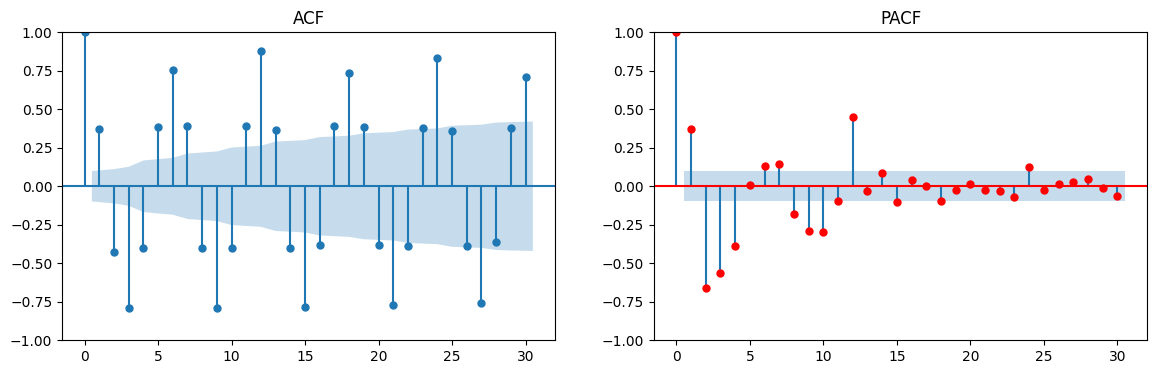

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(y, lags=30, adjusted=False, ax=ax[0])
ax[0].set_title("ACF")
plot_pacf(y, lags=30, ax=ax[1], color='red')
ax[1].set_title("PACF")
plt.show()